# MIS780 Advanced AI For Business - Assignment 2 - T2 2024

## Task Number 3: Gold price forecasting with time-series data

**Student Name:** Sachin Bhat

**Student ID:** 218676233

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)

5. [References](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

This project focuses on forecasting gold prices in USD for a gold trading company to help optimize trading strategies and future investments. By providing accurate predictions, the company can decide the best times to buy or sell gold, reducing risks and boosting profits. Being able to forecast price movements up to 14 days ahead offers a valuable advantage in the often unpredictable gold market.

The dataset contains daily gold prices in six currencies (USD, EUR, GBP, INR, AED, CNY) from 1985 to 2023. These currencies reflect global market trends and factors that influence gold prices, allowing the model to capture a wide range of economic influences.

A Long Short-Term Memory (LSTM) based Recurrent Neural Network (RNN) was built to predict the next 14 days of gold prices by looking at the previous 50 days of data. The best model used 150 LSTM units, 1 hidden layer, 100 hidden nodes, and 50 number of steps; balancing complexity and performance.

Several experiments were conducted by adjusting the number of LSTM units, hidden layers, hidden nodes, and number of steps. The model's accuracy was measured using Mean Absolute Error (MAE).

The top-performing model (**RNN 4**) achieved an average MAE of **14.306 USD** over the 14-day forecast period, with the lowest error being **10.93 USD** on **Day 1** and the highest at **19.22 USD** on **Day 9**. The model handled short-term trends effectively, though it showed slight deviations during more volatile periods. Overall, its performance was strong enough to support informed trading decisions.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.random import set_seed

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIS780 Advanced AI/Assignment 2/Part3_GoldPrice.csv', index_col='Date')

In [ ]:
#Setting the seed to ensure reproducibility
set_seed(42)
np.random.seed(42)

In [ ]:
print(dataset.head())

               USD     EUR     GBP      INR      AED     CNY
Date                                                        
7/01/1985   298.25  392.55  261.17  3741.23  1091.58  835.80
8/01/1985   302.00  395.32  263.07  3820.70  1114.06  853.01
9/01/1985   300.50  393.54  263.14  3742.23  1097.47  840.31
10/01/1985  303.80  397.63  268.02  3853.39  1126.83  862.79
11/01/1985  304.25  398.60  270.57  3845.57  1135.85  869.69


In time-series forecasting, getting the date column right is essential for accurate analysis and modeling. In this case, the dataset includes daily gold prices from 1985 to 2023, with the Date column acting as a key index. The first task is to convert this column from a simple string into a proper datetime format. This step is vital because it allows the data to be treated as a continuous time series, making it easier to perform time-based analysis and ensure everything is in the correct order.

Once the date is set up properly, we focus on the core data—gold prices in six different currencies (USD, EUR, GBP, INR, AED, and CNY). These are the columns we care about for forecasting.

In [ ]:
#Converting the index to datetime format with the correct format (Day/Month/Year)
dataset.index = pd.to_datetime(dataset.index, format='%d/%m/%Y')

In [ ]:
#Using only the relevant columns for prediction
dataset = dataset[['USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY']]


Plotting a simple line graphs for multiple time series:

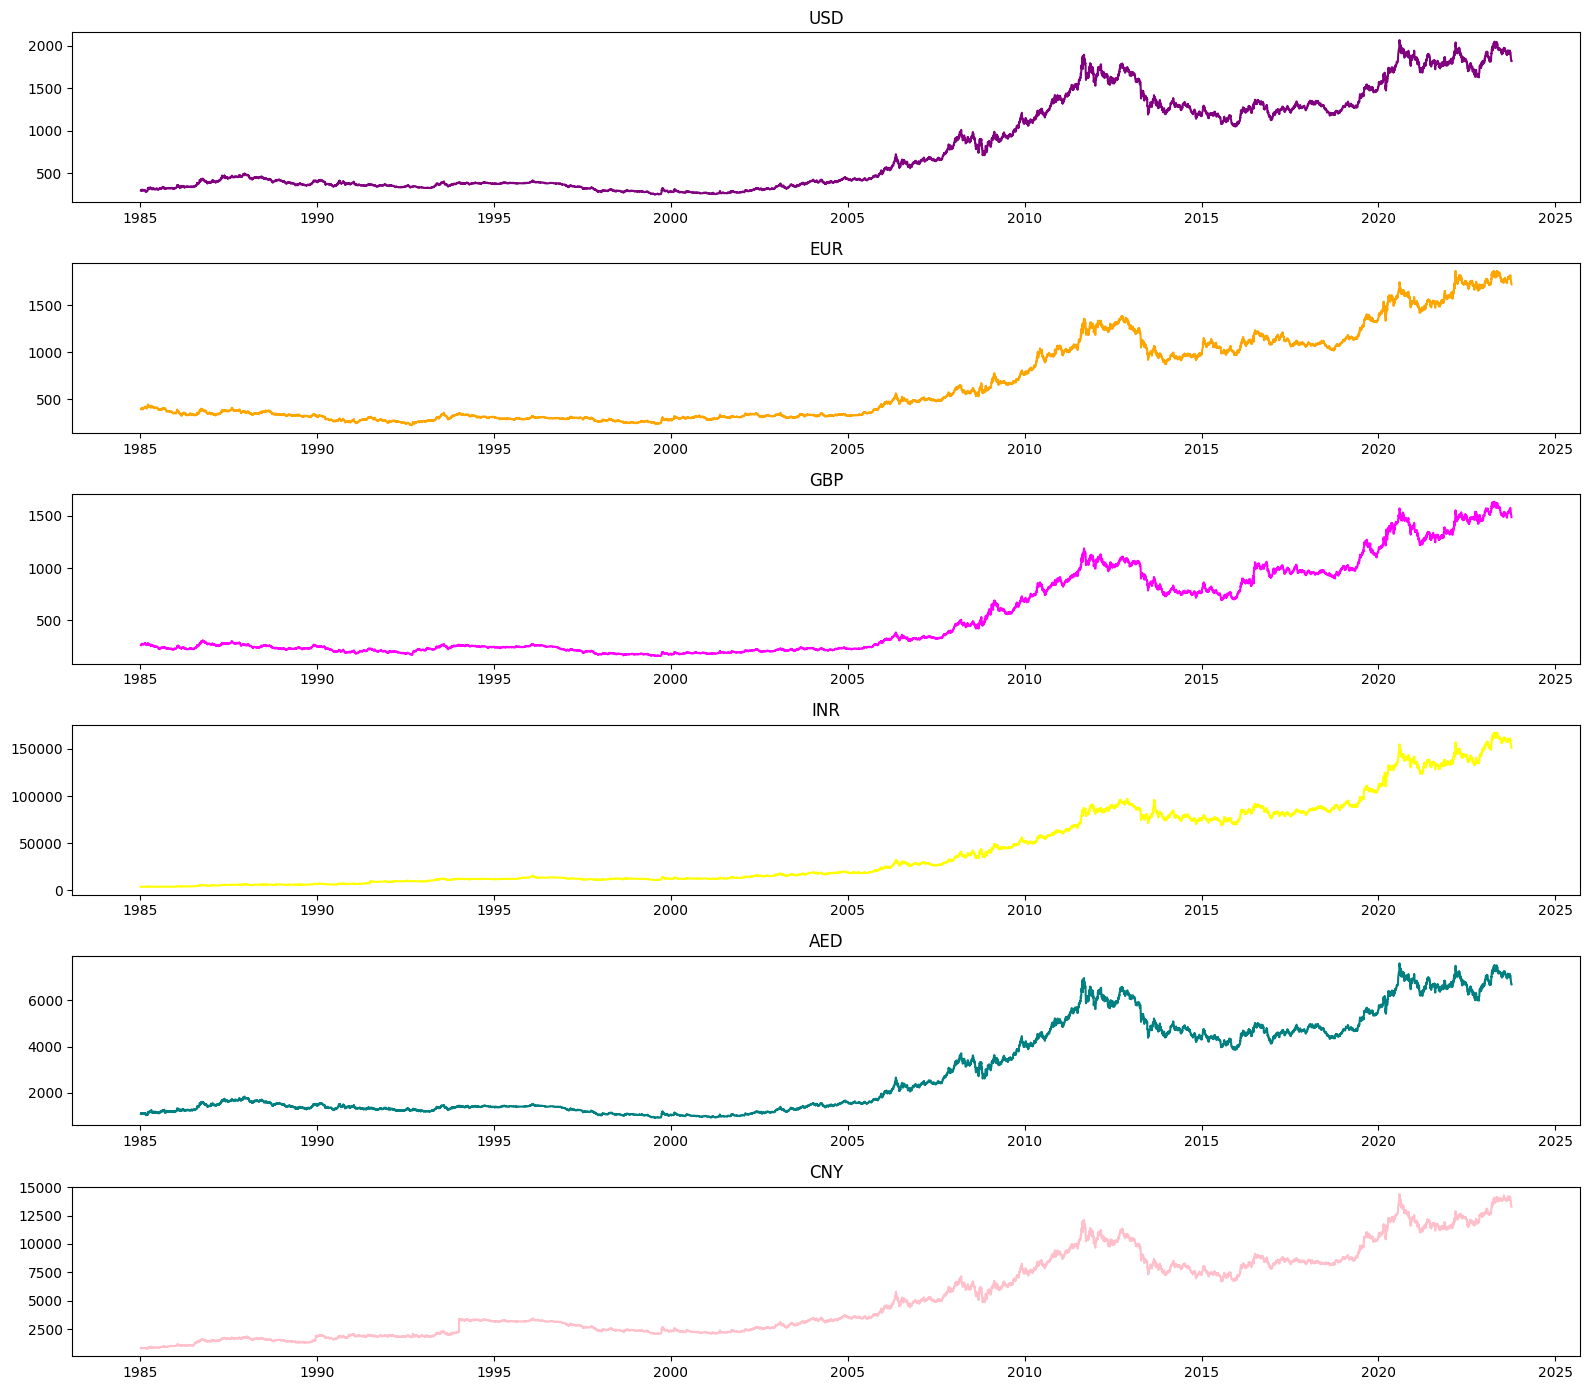

In [ ]:
#Plotting the data for each currency
fig, axs = plt.subplots(6, 1, figsize=(16, 14))
currencies = ['USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY']
colors = ['purple', 'orange', 'magenta', 'yellow', 'teal', 'pink']

for i, currency in enumerate(currencies):
    axs[i].plot(dataset[currency], color=colors[i])
    axs[i].set_title(currency)

plt.tight_layout()
plt.show()

To get a clear picture of historical gold price trends across different currencies, line plots are created for each of the six currencies—USD, EUR, GBP, INR, AED, and CNY—spanning multiple decades. These plots reveal how gold prices have fluctuated over time in various regions and economies.

For example, the USD plot shows a steady upward trend in gold prices, with sharp spikes during times of economic uncertainty or crises, such as recessions or financial market turmoil. The EUR and GBP plots follow similar patterns, but with distinct differences in how volatile the prices are, likely influenced by currency-specific factors like exchange rate shifts and regional economic events. The INR plot, on the other hand, shows steeper growth in gold prices, likely due to the Indian Rupee’s depreciation over time, making gold more expensive in INR compared to other currencies.

Each currency's plot tells a unique story, reflecting both global economic conditions and local currency dynamics. These insights are crucial because they illustrate how gold is valued differently in various parts of the world. Factors such as the strength of the local currency and broader economic trends play significant roles in determining gold prices. Understanding these subtle differences helps improve the accuracy of forecasting future gold prices in USD, as the model incorporates data from all six currencies to make predictions.

By visualizing these trends, it's clear how interconnected global economies are when it comes to gold prices. This reinforces the importance of including multiple currencies in the forecasting model, as it allows the model to capture global factors influencing gold prices and, ultimately, make more accurate predictions over the 14-day forecast period.

To make sure the **LSTM** model works efficiently, we apply feature scaling using MinMaxScaler. This scales all the values down to a range between 0 and 1. Scaling is important because it helps the model avoid giving more weight to larger values and ensures it learns more effectively by preventing problems during training, like the model getting stuck or its calculations becoming unstable.

Finally, the dataset is split into two parts: training data from 2010 to 2021, and test data from 2022 onward. This split mimics real-world forecasting, where the model learns from past trends and is tested on future data to see how well it predicts.

In [ ]:
#Training-testing split:
#Using data from 2010 to the end of 2021 for the training set.
#Using data from 2022 onwards for the test set.

train_set = dataset.loc['2010':'2021']
test_set = dataset.loc['2022':]

In [ ]:
#Checking the shape of the training and test sets
print(f'Training Set Shape: {train_set.shape}')
print(f'Test Set Shape: {test_set.shape}')

Training Set Shape: (3131, 6)
Test Set Shape: (460, 6)


In [ ]:
# Initialising MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
train_set_scaled = sc.fit_transform(train_set)

print('training_set_scaled shape after scaling:', train_set_scaled.shape)

training_set_scaled shape after scaling: (3131, 6)


In [ ]:
# Defining parameters for time-series splitting
n_steps = 50 #lag
forecasting_horizon = 14  #2 weeks ahead

In [ ]:
# Splitting the time series into sequences for LSTM
def split_sequence(sequence, n_steps, forecasting_horizon):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - forecasting_horizon:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:end_ix + forecasting_horizon, 0]  # Predicting USD (index 0)
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Splitting the training set into sequences
X_train, y_train = split_sequence(train_set_scaled, n_steps, forecasting_horizon)

# Reshaping y_train for the LSTM model
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)

In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (3068, 50, 6)
y_train shape: (3068, 14, 1)


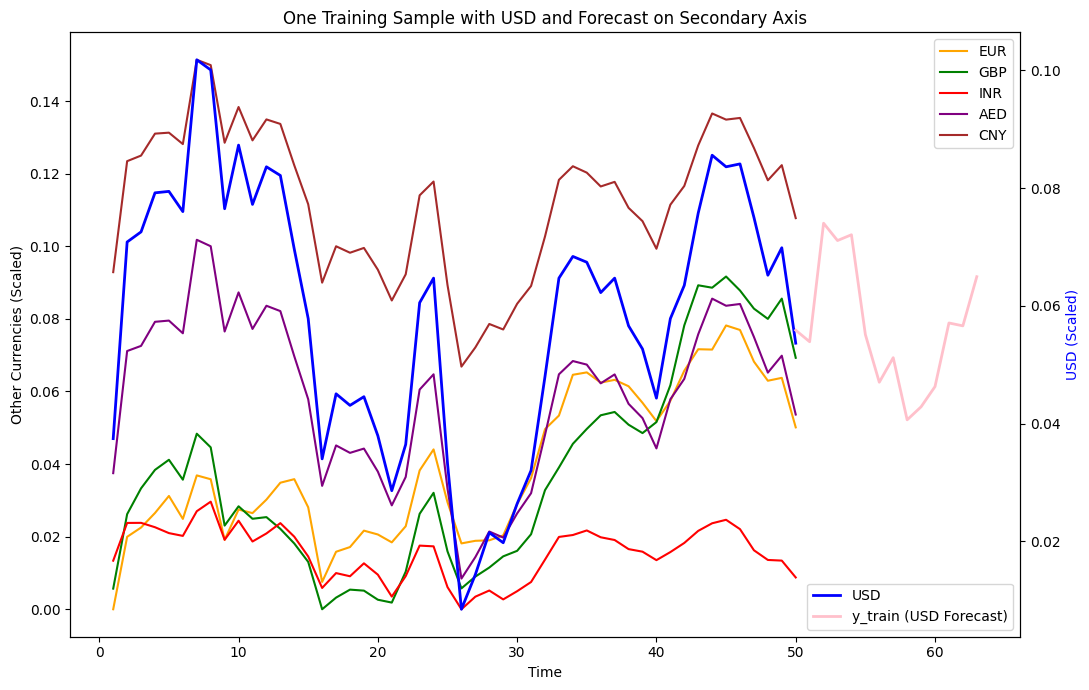

In [ ]:
# Visualising one training sample
# Plotting all currencies with USD and USD forecast on a secondary axis for better visibility

fig, ax1 = plt.subplots(figsize=(11, 7))

# Plotting the other currencies on the primary y-axis
ax1.plot(np.arange(1, n_steps+1, 1), X_train[0, :, 1], color='orange', label='EUR')
ax1.plot(np.arange(1, n_steps+1, 1), X_train[0, :, 2], color='green', label='GBP')
ax1.plot(np.arange(1, n_steps+1, 1), X_train[0, :, 3], color='red', label='INR')
ax1.plot(np.arange(1, n_steps+1, 1), X_train[0, :, 4], color='purple', label='AED')
ax1.plot(np.arange(1, n_steps+1, 1), X_train[0, :, 5], color='brown', label='CNY')

# Setting the labels, titles, and legend for the primary y-axis
ax1.set_xlabel('Time')
ax1.set_ylabel('Other Currencies (Scaled)')
ax1.set_title('One Training Sample with USD and Forecast on Secondary Axis')
ax1.legend(loc='upper right')

# Creating a secondary y-axis for USD
ax2 = ax1.twinx()

# Plotting USD and its forecast on the secondary y-axis
ax2.plot(np.arange(1, n_steps+1, 1), X_train[0, :, 0], color='blue', label='USD', linewidth=2)
ax2.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1), y_train[0], color='pink', label='y_train (USD Forecast)', linewidth=2)

# Setting the secondary y-axis label for USD
ax2.set_ylabel('USD (Scaled)', color='blue')

# Adding a legend for the USD and forecast line on the secondary axis
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()


The blue line represents the historical trend of USD over the past 50 time steps, while the light pink line shows the forecasted USD values for the next 14 days. The forecast begins after the 50th time step and extends into the future, allowing us to see how the model’s predictions compare to the actual USD trend.

We used dual axes to help visualise how well the predicted values (pink line) align with the historical USD data (blue line) and how the trends of the other currencies influence the forecast. The model leverages the patterns and relationships between all six currencies to predict future USD prices, highlighting the importance of understanding how global currency movements impact gold prices. This comparison helps show how closely the model’s forecasts match the expected trends, offering insight into the predictive power of the model.

<a id = "cell_model"></a>
## 3. Predictive Modeling

**RNN Training**

Our LSTM model is built to forecast gold prices in USD over the next 14 days, using historical data from six different currencies. The model is structured with three key layers:

**LSTM Layer**: This layer has 150 units and looks at sequences of 50 previous time steps (or past observations). Its main job is to recognise patterns in how the currency values change over time. By remembering these trends, the model can predict how gold prices might shift in the future.

**Hidden Dense Layer**: After the LSTM layer, there’s a dense layer with 100 units. This layer adds more depth to the learning process, identifying complex patterns in the data that the LSTM layer alone might miss. This helps the model make more accurate predictions.

**Output Layer**: The final layer has 14 units, each representing the predicted gold price for one of the next 14 days. This setup allows the model to produce a full 14-day forecast in one go, making it a practical and efficient tool for predicting future prices.

In [ ]:
# Building the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=150, activation="tanh", input_shape=(n_steps, train_set.shape[1])))  # n_steps=50
model_lstm.add(Dense(units=100, activation="relu"))  # 1 hidden layer with 100 nodes
model_lstm.add(Dense(units=forecasting_horizon))  # 14 predictions

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The model is trained using the RMSprop optimizer and Mean Squared Error (MSE) as the loss function. RMSprop automatically adjusts the learning rate during training, which helps prevent common issues like vanishing gradients when training deep learning models like LSTM. MSE is used to measure how well the model predicts continuous values like gold prices. It penalises larger errors more than smaller ones, pushing the model to minimize big prediction mistakes.

In [ ]:
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 150)                 │          94,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │           1,414 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,714 (432.48 KB)

 Trainable params: 110,714 (432.48 KB)

 Non-trainable params: 0 (0.00 B)

The model has a total of 110,714 trainable parameters which means that all these parameters can be adjusted during training to help the model learn from the data. While this gives the model plenty of capacity to capture patterns in the dataset, it’s still small enough to be efficient and avoid overfitting. The combination of the LSTM layer and dense layers allows the model to handle both short-term fluctuations and long-term trends, giving it the flexibility needed to make accurate predictions without becoming overly complex.


The model is trained for 100 epochs, i.e. it goes through the training data 100 times. It uses a batch size of 32, meaning that the data is processed in smaller chunks, which helps reduce memory usage and speeds up training.

In [ ]:
# Training the model
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0273
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0026
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018
Epoch 10/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017
Epoch 11/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017
Epoch 12/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0017
Epoch 13/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016
Epoch 14/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 15/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epo

In [ ]:
# Scaling the test set (with the same number of features as the training set)
inputs = sc.transform(test_set.values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


**RNN Testing**

In [ ]:
# Splitting the time series into samples for testing
X_test, y_test = split_sequence(inputs, n_steps, forecasting_horizon)

In [ ]:
# Getting the number of test samples
number_test_samples = X_test.shape[0]
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_test shape: (397, 50, 6)
y_test shape: (397, 14)


In [ ]:
# Making prediction using the trained model
predicted_gold_price = model_lstm.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
# Creating a placeholder with 6 columns (since the scaler was fitted with 6 features)
predicted_full = np.zeros((predicted_gold_price.shape[0], 6))

In [ ]:
# Inserting the predicted USD prices in the first column
predicted_full[:, 0] = predicted_gold_price[:, 0]  # Use USD column (0th index)

In [ ]:
# Inverse transforming on this placeholder
predicted_full = sc.inverse_transform(predicted_full)

In [ ]:
# Extracting the USD(first) column from the transformed data
predicted_gold_price_usd = predicted_full[:, 0]

In [ ]:
print('Predicted Gold Price (USD) shape: ', predicted_gold_price_usd.shape)

Predicted Gold Price (USD) shape:  (397,)


In [ ]:
# Similarly for y_test
y_test_full = np.zeros((y_test.shape[0], 6))
y_test_full[:, 0] = y_test[:, 0]

In [ ]:
# Inverse transforming y_test
y_test_full = sc.inverse_transform(y_test_full)

In [ ]:
# Extracting the USD(first) column
y_test_usd = y_test_full[:, 0]

In [ ]:
print('y_test (USD) shape: ', y_test_usd.shape)

y_test (USD) shape:  (397,)


In [ ]:
# Inverse transforming the test data to original units for visualization
X_test = X_test.reshape(-1, X_test.shape[2])  # Reshaping to 2D to match the scaler's input shape
X_test = sc.inverse_transform(X_test)  # Inverse transforming the scaled data
X_test = X_test.reshape(number_test_samples, n_steps, X_test.shape[1])  # Reshaping back to original 3D shape

In [ ]:
print('X_test shape after inverse transform:', X_test.shape)

X_test shape after inverse transform: (397, 50, 6)


In [ ]:
# Visualising the real vs predicted values for a specific test sample
sample_index = 19 # Choosing a test sample index for visualization

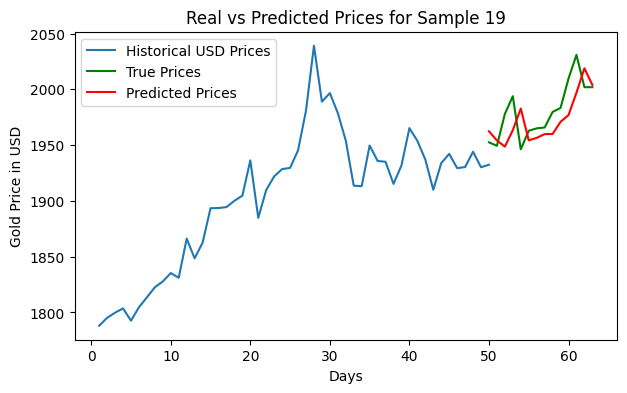

In [ ]:
plt.figure(figsize=(7, 4))

# Plotting historical prices
plt.plot(np.arange(1, n_steps + 1), X_test[sample_index, :, 0], label='Historical USD Prices')

# Plotting the true future prices
plt.plot(np.arange(n_steps, n_steps + forecasting_horizon),
         y_test_usd[sample_index * forecasting_horizon:(sample_index + 1) * forecasting_horizon],
         label='True Prices', color='green')

# Plotting the predicted future prices
plt.plot(np.arange(n_steps, n_steps + forecasting_horizon),
         predicted_gold_price_usd[sample_index * forecasting_horizon:(sample_index + 1) * forecasting_horizon],
         label='Predicted Prices', color='red')

plt.title(f"Real vs Predicted Prices for Sample {sample_index}")
plt.ylabel('Gold Price in USD')
plt.xlabel('Days')
plt.legend(loc='upper left')

plt.show()


Key Insights for Sample 19: The closeness of the green line (true prices) and the red line (predicted prices) shows how accurate the model is in forecasting gold prices over the next 14 days. In the early part of the forecast, the model tracks the true price trend quite closely, especially in the first few days, which highlights its strength in capturing short-term movements.

This graph provides strong evidence of the model's effectiveness in making reliable predictions based on historical patterns. However, as the forecast period progresses, there’s a slight gap between the predicted and true prices, with the model underestimating the actual prices toward the end. This small deviation suggests that while the model performs well in the short term, it could be fine-tuned for better accuracy over longer forecasting periods, as the prediction error tends to grow a bit over time.

**Evaluating Prediction Performance**

In [ ]:
# Evaluating prediction performance with MAE using the inverse-transformed data
def return_mae(test, predicted):
    mae = mean_absolute_error(test, predicted)
    print(f"Mean Absolute Error: {mae:.2f} USD")

# Evaluating MAE for each day in the forecasting horizon (14 days)
for i in range(forecasting_horizon):
    print(f"Forecasting Horizon: Day {i + 1}")
    return_mae(y_test_usd[i::forecasting_horizon], predicted_gold_price_usd[i::forecasting_horizon])
    print("")

Forecasting Horizon: Day 1
Mean Absolute Error: 10.93 USD

Forecasting Horizon: Day 2
Mean Absolute Error: 14.68 USD

Forecasting Horizon: Day 3
Mean Absolute Error: 15.04 USD

Forecasting Horizon: Day 4
Mean Absolute Error: 13.49 USD

Forecasting Horizon: Day 5
Mean Absolute Error: 15.78 USD

Forecasting Horizon: Day 6
Mean Absolute Error: 15.95 USD

Forecasting Horizon: Day 7
Mean Absolute Error: 16.33 USD

Forecasting Horizon: Day 8
Mean Absolute Error: 13.20 USD

Forecasting Horizon: Day 9
Mean Absolute Error: 19.22 USD

Forecasting Horizon: Day 10
Mean Absolute Error: 13.33 USD

Forecasting Horizon: Day 11
Mean Absolute Error: 14.92 USD

Forecasting Horizon: Day 12
Mean Absolute Error: 12.28 USD

Forecasting Horizon: Day 13
Mean Absolute Error: 13.38 USD

Forecasting Horizon: Day 14
Mean Absolute Error: 11.75 USD



In [ ]:
# Plotting real vs predicted values
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("Gold Price Prediction")
    plt.xlabel("Days Ahead")
    plt.ylabel("Gold Price in USD")
    plt.legend()
    plt.show()

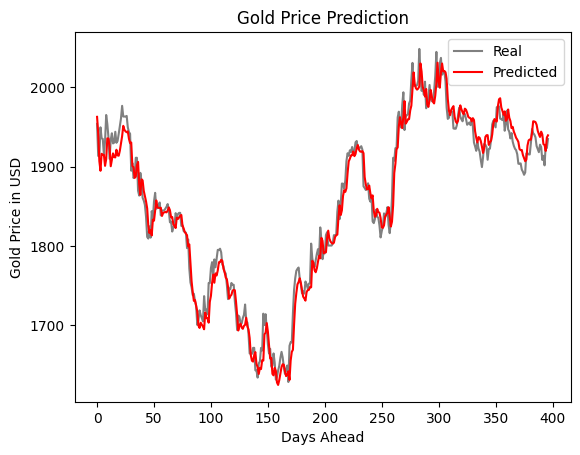

In [ ]:
# Visualising the real vs predicted values for all test samples
plot_predictions(y_test_usd, predicted_gold_price_usd)

The model shows a strong ability to capture the overall trend of gold prices, with the real and predicted values closely aligning. It does a great job of predicting both upward and downward movements, especially during significant changes in price, like the sharp increase around day 250 and the following fluctuations.

One of the standout strengths of the model is how well it predicts the peaks and valleys; those critical turning points where prices shift direction. These moments are particularly important, and the close match between predicted and actual prices here shows that the model has successfully learned the patterns in the data and can anticipate future movements with accuracy.

However, there are small areas where the model's predictions fall slightly short. For example, around day 100, the predicted prices are a bit lower than the real values. These small deviations suggest that there’s room for improvement.

In [ ]:
# Ensuring that both y_test_usd and predicted_gold_price are reshaped as 2D arrays
y_test_usd = y_test.reshape(number_test_samples, forecasting_horizon)  # Reshaping to match the prediction
predicted_gold_price_usd = predicted_gold_price

Visualizing Predictions for Day 1 Ahead:


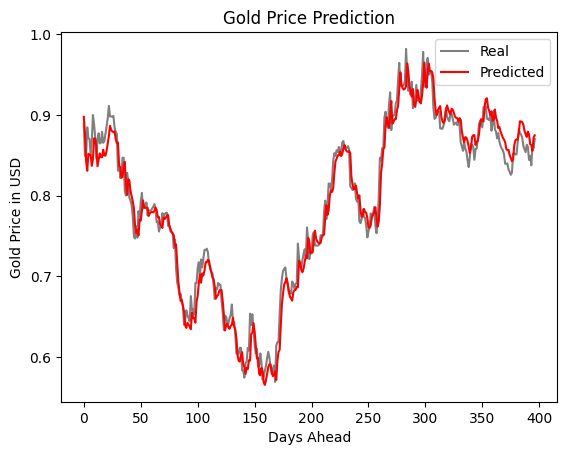

Visualizing Predictions for Day 7 Ahead:


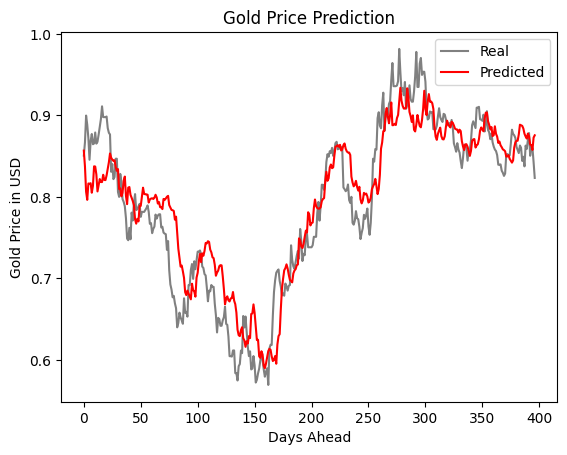

Visualizing Predictions for Day 14 Ahead:


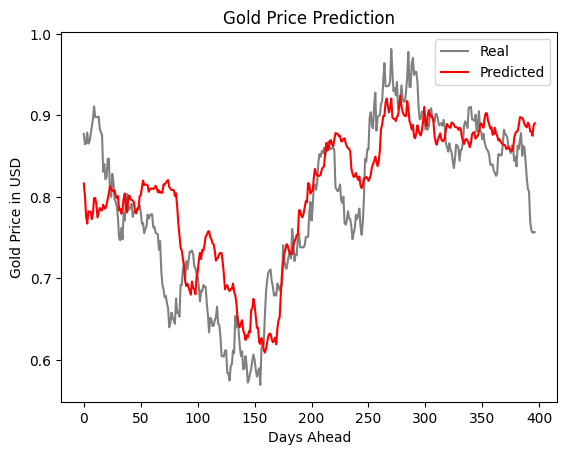

In [ ]:
# Visualising the predictions for multiple horizons
for horizon in [0, 6, 13]:  # 1 day, 7 days, and 14 days ahead
    print(f"Visualizing Predictions for Day {horizon + 1} Ahead:")
    plot_predictions(y_test_usd[:, horizon], predicted_gold_price_usd[:, horizon])

For **1-day ahead** predictions, the model does a great job of matching the real prices, showing it can accurately capture short-term trends. The predicted and actual values are almost spot on, which is reassuring for short-term forecasting.

When looking at **7 days ahead**, the model is still performing well, with the real and predicted prices staying fairly close. However, there’s a slight increase in error as the forecast horizon extends, which is expected with mid-range predictions.

By **14 days ahead**, the difference between the real and predicted prices becomes more noticeable, especially during times of higher price fluctuations. While the model does a decent job, the accuracy starts to drop as the forecast moves further into the future.

<a id = "cell_report"></a>
## 4. Experiments Report

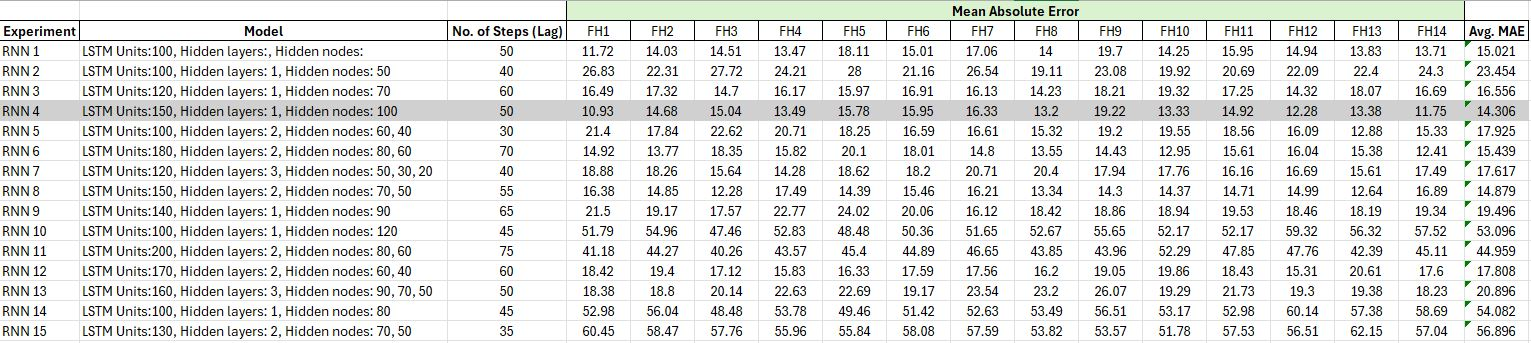

**General Discussion**: Increasing the number of LSTM units from 100 to 150 leads to noticeable improvements in the model’s performance. For example, RNN 4, which has 150 units, delivered the best results, outperforming models with fewer units like RNN 1 and even models with more units, such as RNN 13.

Models with 1 or 2 hidden layers (like RNN 4 and RNN 5) performed better than those with 3 hidden layers (such as RNN 14). It shows that there needs to be a balance between the model’s complexity and its ability to generalize to new data.

Overall, the relationship between complexity and performance is clear: more complex models, like RNN 14 with its 3 hidden layers and 160 LSTM units, don’t necessarily produce better results and come with higher computational costs. In contrast, simpler models, like RNN 4, which has fewer layers but a moderate number of LSTM units, tend to perform more efficiently and accurately.

**Best Performing Model (RNN 4)**:

The performance of the best-performing LSTM model is measured using the **Mean Absolute Error (MAE)**. The results show that the model does a good job with short-term predictions, especially on Day 1, where it has the lowest error of 10.93 USD. However, as we look further ahead, the error increases, reaching its highest point on Day 9 with an error of 19.22 USD. This highlights the challenge of keeping predictions accurate over longer periods. Interestingly, after Day 9, the error starts to drop again, suggesting that the model’s performance becomes more stable in the days that follow.

The top-performing model, RNN 4, achieves the lowest error **because** it strikes the perfect balance between **complexity** and **learning ability**. With 150 LSTM units and 1 hidden layer containing 100 nodes, the model is able to effectively capture the patterns in the data without overfitting. This means it can make accurate predictions for both short-term and long-term forecasts, making it an ideal tool for the gold trading company to predict prices and make smart trading decisions.

**Key Insights:**

The spike in MAE on **Day 9** suggests that the model has difficulty accurately predicting prices during periods of volatility. Gold prices can be influenced by factors like market sentiment, geopolitical events, and economic indicators, which can cause sudden and unpredictable price changes. During these times of high volatility, the model struggles to capture these rapid fluctuations, resulting in larger gaps between the predicted and actual prices.

The MAE tends to grow the further into the future the model predicts. This happens because each prediction builds on the previous one, so small errors can accumulate over time, leading to a higher MAE. This is a common challenge with time series models, as they are typically more accurate for short-term forecasts but face increasing difficulty as the forecast horizon extends.

**Business Impact:**

The LSTM model provides a valuable advantage to the gold trading company by offering reliable short- and mid-range forecasts for gold prices. With predictions up to 14 days ahead, the company can make well-informed decisions related to trading, managing inventory, and minimizing risks.

**Informed Decision Making**: The model’s accurate short-term predictions, with relatively low errors in the first few days, enable the company to anticipate market trends and adjust its strategies. This helps them identify the best times to buy or sell gold, maximizing profits by making timely, data-driven moves.

**Risk Management**: The 14-day forecast allows the company to stay ahead of potential price changes, reducing the risks of sudden market shifts. For example, if the model predicts a sharp increase in gold prices within the next 7 days, the company can stock up on gold in advance, taking advantage of the expected rise in value.

**Future Improvements**:

**Volatility Sensitivity**: The higher error on Day 9 suggests that the model has difficulty predicting prices during highly volatile periods. This can be improved by incorporating external factors like macroeconomic data (e.g. inflation rates, interest rates) or market sentiment. Including these additional features could help the model better anticipate sudden price movements and reduce errors during volatile times.

**Extended Horizon**: While the model performs well in the short term, the error increases as the forecast period extends. To improve long term predictions, further tuning of key parameters like the number of LSTM units or learning rate could be explored. Additionally, trying out ensemble models or hybrid techniques like combining LSTM with other machine learning methods could help enhance performance over longer horizons.

The model already offers a strong base for predicting gold prices, but there’s room for improvement. By adding more data and refining its structure, the company can boost accuracy and make even smarter decisions in the fast-paced gold trading market.

<a id = "cell_report"></a>
## 5. References

1. Google Colaboratory. (n.d.). Google Colaboratory. https://colab.research.google.com/

2. Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. Nature, 585(7825), 357-362. https://doi.org/10.1038/s41586-020-2649-2

3. Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. https://doi.org/10.1109/MCSE.2007.55

4. McKinney, W. (2010). Data structures for statistical computing in Python. Proceedings of the 9th Python in Science Conference, 51-56. https://doi.org/10.25080/Majora-92bf1922-00a

5. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830. https://www.jmlr.org/papers/v12/pedregosa11a.html

6. Chollet, F., & others. (2015). Keras. https://keras.io

7. Abadi, M., Barham, P., Chen, J., Chen, Z., Davis, A., Dean, J., ... & Zheng, X. (2016). TensorFlow: A system for large-scale machine learning. Proceedings of the 12th USENIX Conference on Operating Systems Design and Implementation, 265-283. https://dl.acm.org/doi/10.5555/3026877.3026899